In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

DATA_PATH = 'datasets\lifesat\\'

In [2]:
# Load data
oecd_bli = pd.read_csv(DATA_PATH + 'oecd_bli_2015.csv', thousands=',')
gdp_per_capita = pd.read_csv(DATA_PATH + 'gdp_per_capita.csv', thousands=',', delimiter='\t', encoding='latin1', na_values='n/a')

In [3]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


array([[<AxesSubplot:title={'center':'2015'}>,
        <AxesSubplot:title={'center':'Estimates Start After'}>]],
      dtype=object)

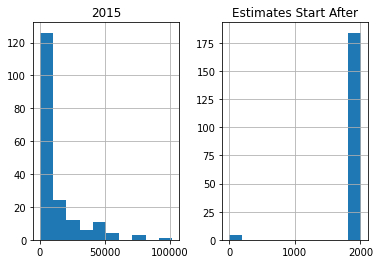

In [6]:
gdp_per_capita.hist()

In [14]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [15]:
#Prepare data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

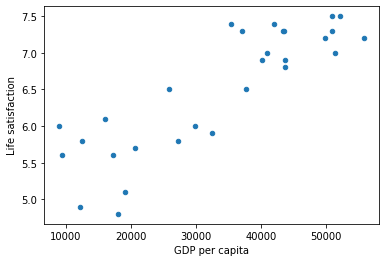

In [16]:
# Visualize data
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.show()

In [17]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

#import sklearn.neighbors
#model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [18]:
# Train the model
model.fit(X, y)

LinearRegression()

In [25]:
# Make a prediction for Cyprus
X_new = [[22587]]
print(model.predict(X_new)) #outputs [[ 5.9624 ]]

[[5.96242338]]


In [50]:
oecd_bli[(oecd_bli['Country'].isin(['Slovenia', 'Portugal', 'Spain'])) & (oecd_bli['Indicator'] == 'Life satisfaction') & (oecd_bli['INEQUALITY'] == 'TOT')].head(50)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
2691,PRT,Portugal,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,5.1,NaN,NaN
2693,ESP,Spain,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,6.5,NaN,NaN
2704,SVN,Slovenia,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,5.7,NaN,NaN


In [53]:
oecd_bli[(oecd_bli['Indicator'] == 'Life satisfaction') & (oecd_bli['INEQUALITY'] == 'TOT')].sort_values(by='Value')

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
2678,GRC,Greece,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,4.8,NaN,NaN
2679,HUN,Hungary,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,4.9,NaN,NaN
2691,PRT,Portugal,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,5.1,NaN,NaN
2696,TUR,Turkey,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,5.6,NaN,NaN
2701,EST,Estonia,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,5.6,NaN,NaN
2704,SVN,Slovenia,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,5.7,NaN,NaN
2690,POL,Poland,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,5.8,NaN,NaN
2684,KOR,Korea,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,5.8,NaN,NaN
2683,JPN,Japan,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,5.9,NaN,NaN
2682,ITA,Italy,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,6.0,NaN,NaN


In [63]:
gdp_per_capita[gdp_per_capita['GDP per capita'] > 18064.288].sort_values(by='GDP per capita').head(150)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Trinidad and Tobago,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",18085.759,2012.0
Portugal,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",19121.592,2014.0
Slovenia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",20732.482,2015.0
Saudi Arabia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",20812.586,2010.0
Taiwan Province of China,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",22287.562,2015.0
Cyprus,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",22587.490,2014.0
Malta,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",22828.897,2014.0
Bahrain,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",23509.981,2014.0
The Bahamas,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",23902.805,2013.0
